## Objetivo da atividade
*Trabalhar os algorítmos de busca de melhoria iterativa para problemas de otmização*

## Descrição da atividade
Esta atividade consiste na construção de agentes que têm como objetivo encontrar a melhor configuração de	uma antena de modo a conseguir o maior ganho com o padrão de radiação emitido/recebido pela sua disposição.

Para tal são sugeridos a implementação dos algorítmos de Subida da Encosta (Hill Climbing) e suas variações, bem como os algoritmos da Têmpera Simulada (Simulated Annealing) e os Algorítmos Genéticos (Genetic Algorithm).

Existem vários exemplos da aplicação dessa classe de algoritmos na resolução de diversos problemas práticos, como o do projeto automático de antenas para a espaçonave ST5 da NASA (Figura 1).

O formato da antena apresentado na Figura 1 foi encontrado por um programa de desenho evolutivo, de forma a criar o melhor padrão de radiação possível.	O complicado formato apresentado dificilmente seria desenhado por um humano e o resultado dos algorítmos	implementados conseguiu apresentar os melhores resultados, superando o desempenho dos projetistas humanos.

<p align="center">
	<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/St_5-xband-antenna.jpg" alt="Antena" height="280" width="218"/>
	<br/>
	<em>Figura 1 - Antena criada para a espaçonave ST5 da NASA.</em>
</p>

## Abstração, representação, descrição e teste da antena
A antena que iremos manipular será um modelo simplificado e será representado utilizando como inspiração o sistema esférico de coordenadas, representado na Figura 2.

Um ponto P(r, φ, θ) nesse sistema esférico de coordenadas é composto de um raio r e mais dois ângulos φ e θ que permitem localizar esse ponto, tal como indicado na Figura 2.

<p align="center">
	<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Esfera_con_coordenadas_esfericas.png" alt="Coordenadas Esféricas"/>
	<br/>
	<em>Figura 2 - Sistema esférico de coordenadas.</em>
</p>

Nossa antena será composta de segmentos de mesmo tamanho, desse modo o valor de r não vai variar para cada parte dela. E assim as variações do design ou projeto serão somente nos pares de ângulos (φ, θ) para cada junção.

A antenha será composta de 3(três) junções e cada ângulo será representado em graus inteiros variando no intervalo [0º, 360º)

Com os 3(três) pares de angulos definidos esses poderão ser submetidos para teste pode meio da url descrita a seguir, substituindo os ___ pelo valor do respectivo ângulo dentro do intervalo [0;360)

(Obs.: Será mostrado como inicializar o servidor na próxima seção)

```
/antenna/simulate?phi1=___&theta1=___&phi2=___&theta2=___&phi3=___&theta3=___
```
Exemplo de requisição:

```
http://localhost:8080/antenna/simulate?phi1=90&theta1=90&phi2=90&theta2=90&phi3=90&theta3=90
```

Caso a requisição esteja formatada corretamente o servidor retornará o ganho conseguido pela antena (primeira linha), bem como os ângulos utilizados (nas demais linhas), tal como no exemplo descrito a seguir.

Exemplo de resposta:
```
-6.146398388793574
phi1 = 90
theta1 = 90
phi2 = 90
theta2 = 90
phi3 = 90
theta3 = 90
```

Tal como já mencionado anteriormente o objetivo é obter o maior ganho, ou seja, o mair valor representado na primeira linha da resposta do teste da antena.

## Inicializando o ambiente para teste da antena

Para inicializar o ambiente você vai precisar do Java instalado. Em seguida baixe o arquivo `OPServer.jar` (deste repositório), abra o Terminal (no linux ou mac) ou a Linha de Comando (no Windows) e execute o seguinte comando:

```
java -jar OPServer.jar
```

Isso vai inicializar o ambiente de simulação que foi implementado sob a forma de um servidor web em Java para que este receba as requisições, comentadas anteriormente, calcule o ganho conseguido pela antena e retorne o resultado.


In [3]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [20]:
def cost_function(phi1, theta1, phi2, theta2, phi3, theta3):
    value = requests.get(f'http://localhost:8080/antenna/simulate?phi1={phi1}&theta1={theta1}&phi2={phi2}&theta2={theta2}&phi3={phi3}&theta3={theta3}')

    return float(value.text.split('\n')[0])

In [12]:
float(cost_function(12, 90, 90, 90, 90, 30))

0.44942041003876526

In [153]:
def plot_box_plot(dict_data, title, x_label, y_label):
  df = pd.DataFrame(dict_data)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  df.boxplot()

  # plt.show()

In [164]:
class ParticleConstriction:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.fitness_best_i=-1          # best fitness individual
        self.fitness_i=-1               # fitness individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.position_i = list(map(lambda x: round(x), self.position_i))

        self.fitness_i=costFunc(self.position_i[0], self.position_i[1], self.position_i[2], self.position_i[3], self.position_i[4], self.position_i[5])

        # check to see if the current position is an individual best
        if self.fitness_i>self.fitness_best_i or self.fitness_best_i==-1:
            self.pos_best_i=self.position_i
            self.fitness_best_i=self.fitness_i

    # update new particle velocity
    def update_velocity(self,pos_best_g, constriction = True):
        w = 0.5
        c1=2.05        # cognitive constant
        c2=2.05     # social constant
        phi = c1 + c2

        # Insert Constriction "K"
        K = 2/np.abs(2- phi - np.sqrt((phi**2) - (4*phi)))

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            if constriction:
                self.velocity_i[i]=K*(self.velocity_i[i]+vel_cognitive+vel_social)
            else:
                self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i]<bounds[i][0]:
                self.position_i[i]=bounds[i][0]

class PSO():
    def __init__(self,costFunc, init_random, bounds,num_particles,maxiter, constriction = True):
        global num_dimensions

        self.best_fitness_per_epoch = []

        num_dimensions=len(bounds)
        fitness_best_g=-1               # best fitness for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(ParticleConstriction(init_random(bounds)))

        # begin optimization loop
        i=0
        while i<maxiter:
            print (i,fitness_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].fitness_i>fitness_best_g or fitness_best_g==-1:
                    pos_best_g=list(swarm[j].position_i)
                    fitness_best_g=float(swarm[j].fitness_i)


            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g, constriction)
                swarm[j].update_position(bounds)

            # Get the best fitness in epoch
            self.best_fitness_per_epoch.append(fitness_best_g)

            i+=1
        # print final results
        print ('FINAL:')
        print (pos_best_g)
        print (fitness_best_g)

In [55]:
def init_random(bounds):
  inital_values = []
  for i in range(len(bounds)):
    inital_values.append(np.random.randint(bounds[i][0], bounds[i][1]))
  return inital_values

# Variáveis de otimização
- Phi1
- Theta1
- Phi2
- Theta2
- Phi3
- Theta3
Todas pertecem ao intervalo de 0° a 360°

In [148]:
bounds = [[0, 360], [0, 360], [0, 360], [0, 360], [0, 360], [0, 360]]

In [149]:
result = PSO(cost_function, init_random, bounds, 100, 200)

0 -1
1 10.951513247263746
2 19.749990698296884
3 20.751736543968324
4 20.751736543968324
5 20.751736543968324
6 23.993436981452753
7 24.347552923454575
8 26.565161753483025
9 26.565161753483025
10 27.485258821569758
11 27.485258821569758
12 27.485258821569758
13 27.485258821569758
14 27.485258821569758
15 27.485258821569758
16 27.485258821569758
17 27.64940220889136
18 27.64940220889136
19 27.730874489134006
20 27.730874489134006
21 27.730874489134006
22 27.730874489134006
23 27.886860350217532
24 28.010573142268083
25 28.300555436868336
26 28.300555436868336
27 28.300555436868336
28 28.300555436868336
29 28.300555436868336
30 28.300555436868336
31 28.300555436868336
32 28.300555436868336
33 28.31884945822091
34 28.34196358102543
35 28.350848794596978
36 28.357020046602003
37 28.357020046602003
38 28.357020046602003
39 28.357020046602003
40 28.358412710439374
41 28.358412710439374
42 28.358412710439374
43 28.361551257082112
44 28.361551257082112
45 28.361551257082112
46 28.363449512712

In [158]:
results_by_particle_swarm = {}
for i in range(100, 210, 10):
    results_by_particle_swarm[i] = []
    for j in range(30):
        current_result = PSO(cost_function, init_random, bounds, i, 100)
        results_by_particle_swarm[i].append(max(current_result.best_fitness_per_epoch))

0 -1
1 10.90646599084545
2 16.294458052583092
3 23.629730293169587
4 23.629730293169587
5 25.90848529525704
6 25.90848529525704
7 25.90848529525704
8 27.222704722438753
9 27.222704722438753
10 27.222704722438753
11 27.222704722438753
12 27.6088417204471
13 27.6088417204471
14 27.6088417204471
15 27.6088417204471
16 27.741776435156776
17 27.741776435156776
18 27.741776435156776
19 27.800849494929377
20 27.800849494929377
21 27.800849494929377
22 27.800849494929377
23 27.800849494929377
24 27.807294096501927
25 27.816569494847535
26 27.816569494847535
27 27.83475877038194
28 27.83475877038194
29 27.83475877038194
30 27.83475877038194
31 27.83475877038194
32 27.83475877038194
33 27.83475877038194
34 27.83475877038194
35 27.838390499791345
36 27.838390499791345
37 27.838390499791345
38 27.838390499791345
39 27.838390499791345
40 27.838390499791345
41 27.838390499791345
42 27.838390499791345
43 27.838390499791345
44 27.838390499791345
45 27.838390499791345
46 27.838390499791345
47 27.838390

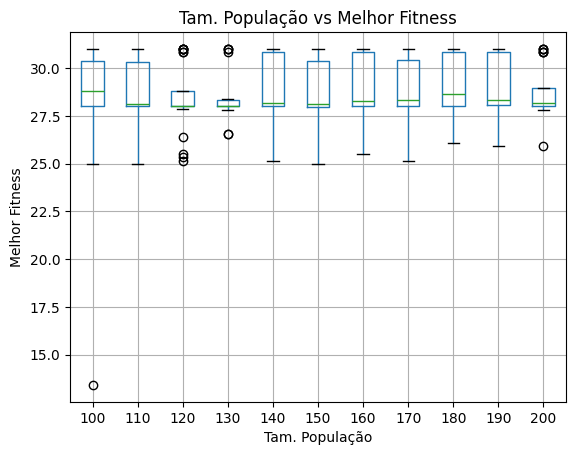

In [162]:
plot_box_plot(results_by_particle_swarm, "Tam. População vs Melhor Fitness", "Tam. População", "Melhor Fitness")
plt.show()

In [166]:
results_by_constriction = {}
for i in range(2):
    results_by_constriction[i] = []
    for j in range(30):
        current_result = PSO(cost_function, init_random, bounds, 100, 100, constriction = True if i == 0 else False)
        results_by_constriction[i].append(current_result.best_fitness_per_epoch)

0 -1
1 14.901197976779018
2 20.833773771041294
3 20.833773771041294
4 22.86430648445519
5 22.86430648445519
6 24.880873473348558
7 24.880873473348558
8 24.880873473348558
9 25.07346071396087
10 25.76004651555002
11 25.76004651555002
12 25.76004651555002
13 26.159547927911582
14 26.159547927911582
15 26.159547927911582
16 26.159547927911582
17 26.159547927911582
18 26.159547927911582
19 26.162967522437476
20 26.162967522437476
21 26.3132228776258
22 26.3132228776258
23 26.355147192576112
24 26.355147192576112
25 26.355147192576112
26 26.355147192576112
27 26.355147192576112
28 26.381658863888497
29 26.381658863888497
30 26.388204553143616
31 26.388204553143616
32 26.411003638815856
33 26.411003638815856
34 26.411003638815856
35 26.41523712020726
36 26.41523712020726
37 26.41523712020726
38 26.41523712020726
39 26.415631780170813
40 26.418796357253143
41 26.505061095302132
42 26.505061095302132
43 26.505061095302132
44 26.505061095302132
45 26.505061095302132
46 26.505061095302132
47 26.

In [167]:
def plot_error(dict_data, title, x_label, y_label, legends = [], colors = ["blue", "red", "green"]):
  colors = ["blue", "red", "green"]
  for t in list(dict_data.keys()):
    dict_data[t] = np.array(dict_data[t])
    transpose = dict_data[t].transpose()
    stds = np.std(transpose, axis = 1)
    means = np.mean(transpose, axis= 1)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.plot(range(transpose.shape[0]), means, color = colors[list(dict_data.keys()).index(t)], marker='o')
    plt.errorbar(range(transpose.shape[0]), means,fmt='o', yerr=stds, capsize=4, color = colors[list(dict_data.keys()).index(t)], label = legends[list(dict_data.keys()).index(t)])
    plt.legend()

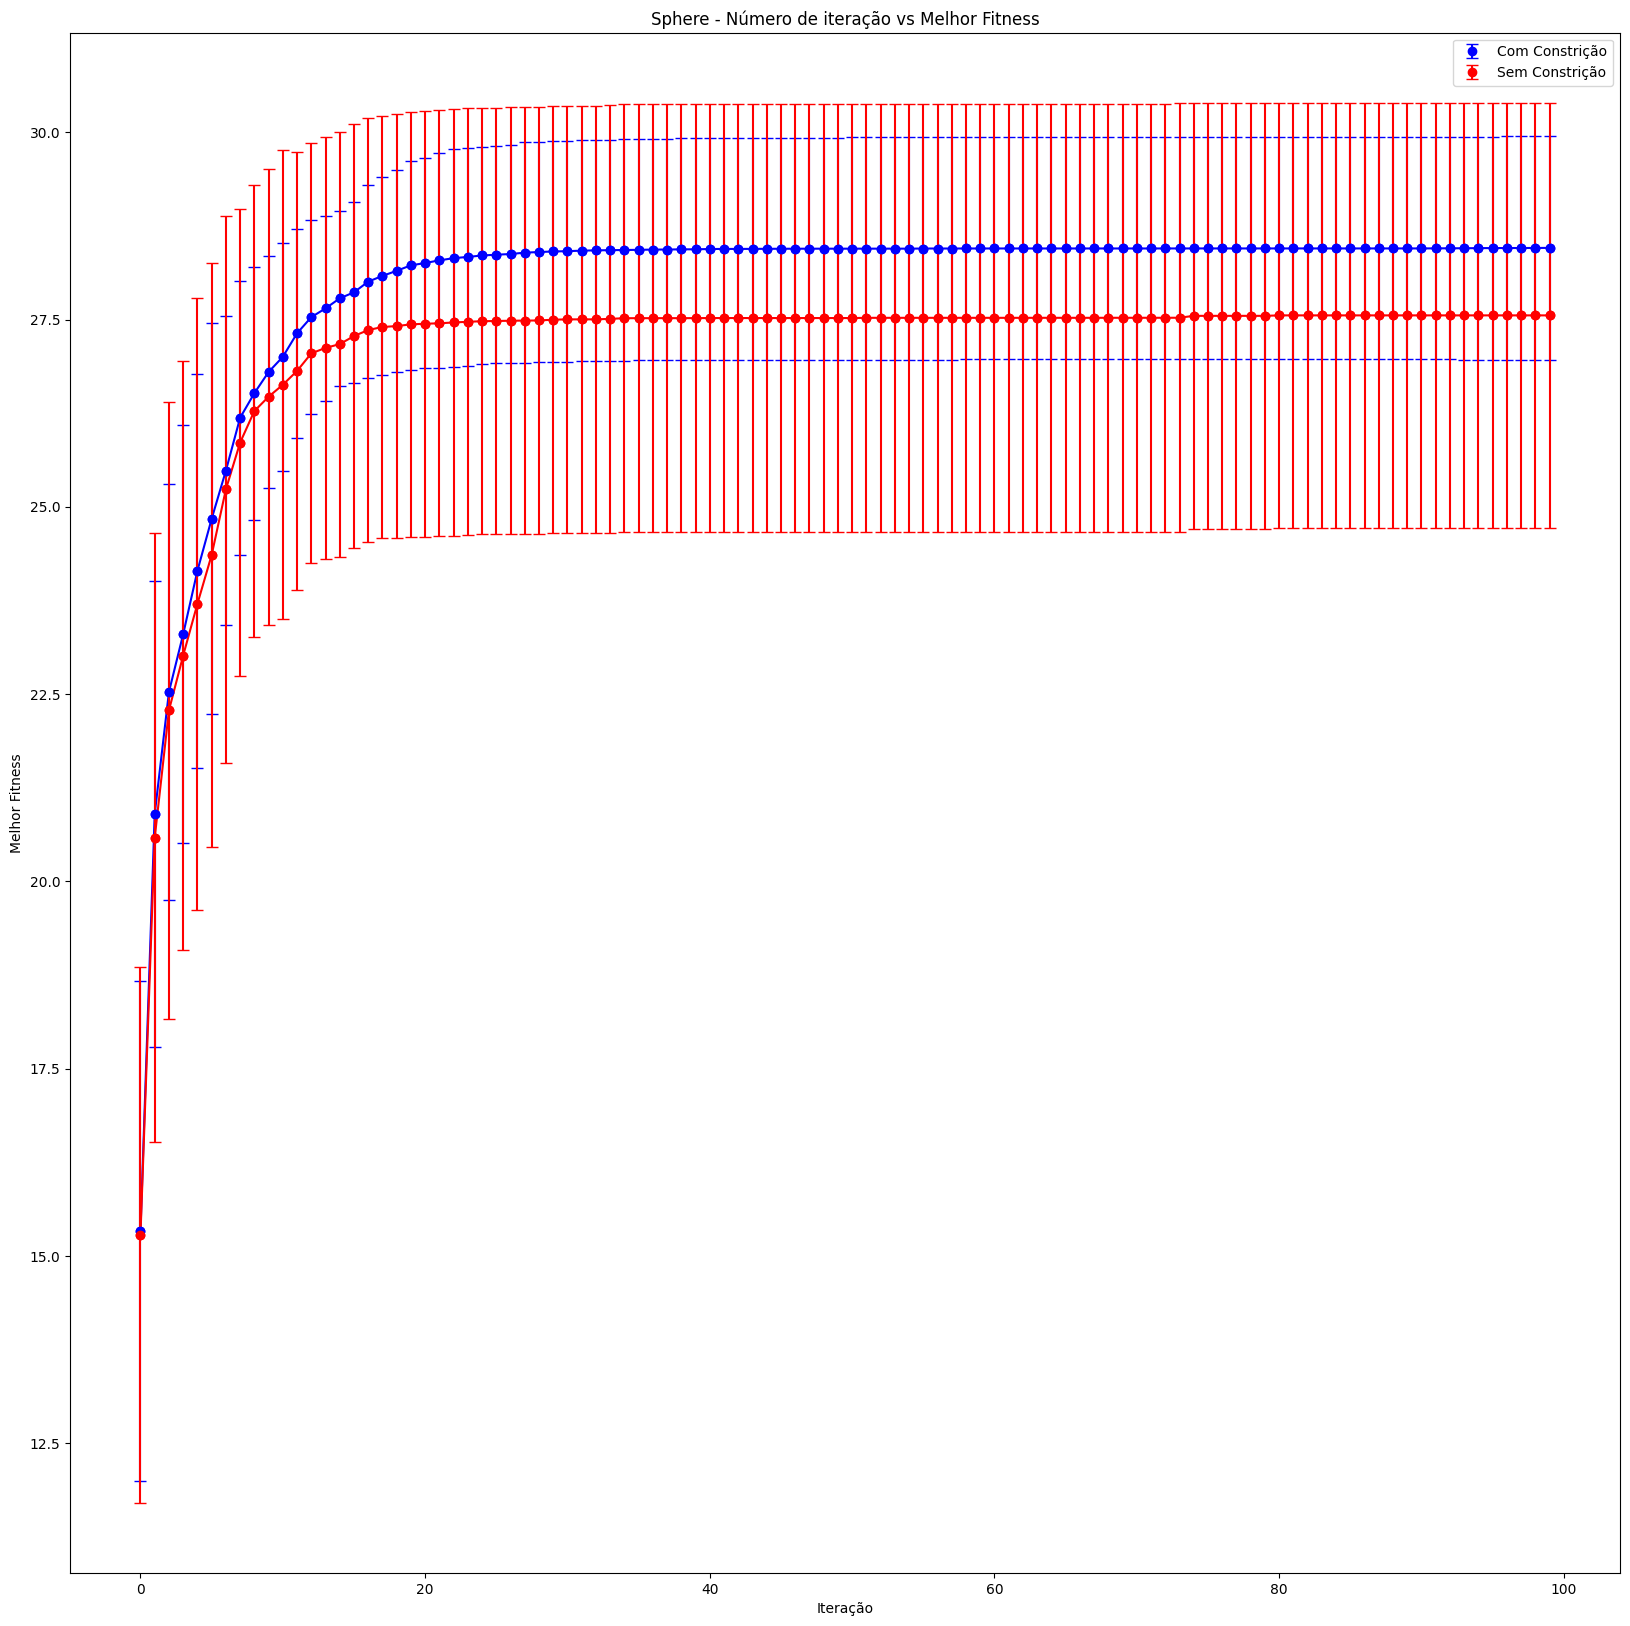

In [170]:
plt.figure(figsize=(20, 20))
plot_error(results_by_constriction,"Sphere - Número de iteração vs Melhor Fitness", "Iteração", "Melhor Fitness",legends = ["Com Constrição", "Sem Constrição"])
plt.show()